In [1]:
import numpy as np
import onnxruntime as rt
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sess = rt.InferenceSession("Resnet34_3inputs_448x448_20200609.onnx")

In [3]:
inputs = sess.get_inputs()

(1, 3, 448, 448)

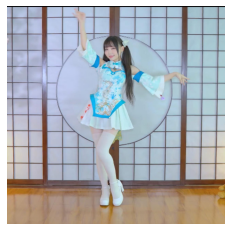

In [4]:
img = cv2.imread("D:/photo/pose/5.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(448,448))
img = img.astype(np.float32)/255.0

plt.imshow(img)
plt.axis('off')

img = img.transpose(2,1,0)
img = img[np.newaxis,...]
img.shape

In [5]:
pred_onx = sess.run(None,{
    inputs[0].name:img,
    inputs[1].name:img,
    inputs[2].name:img
})

In [6]:
offset3D = np.squeeze(pred_onx[2])
heatMap3D = np.squeeze(pred_onx[3])
print(offset3D.shape)
print(heatMap3D.shape)
print(offset3D.shape[0]/heatMap3D.shape[0])

(2016, 28, 28)
(672, 28, 28)
3.0


In [7]:
kps = np.zeros((24,3),np.float32)
for j in range(0,24):
    # 找到第j个关节的28个特征图，并找到最大值的索引
    joint_heat = heatMap3D[j*28:(j+1)*28,...]
    [x,y,z] = np.where(joint_heat==np.max(joint_heat))
    x=int(x[-1])
    y=int(y[-1])
    z=int(z[-1])
    #通过heatmap的索引找到对应的offset图，并计算3D坐标的xyz值
    pos_x = offset3D[j*28+x,y,z] + x
    pos_y = offset3D[24*28+j*28+x,y,z] + y
    pos_z = offset3D[24*28*2+j*28+x,y,z] + z
    
    kps[j,0] = pos_x
    kps[j,1] = pos_y
    kps[j,2] = pos_z
    print("%f,%f,%f;" %(pos_x,pos_y,pos_z))

14.292808,14.994286,6.560671;
13.876945,15.480020,8.367174;
11.333992,19.526013,9.689342;
10.005803,19.631011,9.902869;
10.462221,20.058030,9.978684;
15.467721,11.799177,6.442902;
12.627172,10.170249,5.793395;
11.883983,9.653589,3.315797;
12.667377,9.906492,1.420080;
11.847811,9.461526,2.985400;
14.378544,12.237494,4.861951;
13.260656,12.452946,4.971551;
13.321401,14.203241,5.388393;
13.328668,13.130285,4.690327;
12.743999,12.918788,5.623796;
14.216525,13.818989,12.736558;
14.793380,13.383042,17.217846;
13.698896,13.578391,22.771403;
13.593887,13.623824,23.280162;
14.380849,11.442493,12.643937;
11.889107,11.706800,18.199158;
12.794100,12.321799,22.871758;
11.883900,12.384522,24.476318;
13.499789,12.706437,11.490892;


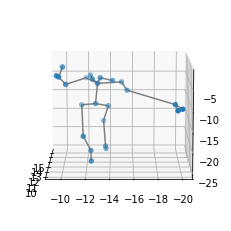

In [15]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter3D(kps[:,0],-kps[:,1],-kps[:,2],'red')
parent = np.array([15,1,2,3,3,  15,6,7,8,8,   12,15,14,15,24,  24,16,17,18,  24,20,21,22, 0])-1;
for i in range(24):
    if(parent[i]!=-1):
        ax.plot3D(kps[[i,parent[i]],0], -kps[[i,parent[i]],1], -kps[[i,parent[i]],2], 'gray')
        
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)

ax.view_init(elev=10., azim=180)